# False clouds in ABI static features

Clouds that do not move or evolve are more likely to be false clouds. This program overlays ABI imagery in order to see which features do not evolve with time. 

ABI data is from /mnt/grb/goes16/ on smiller2

In [1]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

In [2]:
date = "20220914"

root = "/home/jturner/false_low_clouds_2023/Static_Features/"+date

## Visualizing a specific time

In [3]:
data_1 = xr.open_dataset(root+'/OR_ABI-L1b-RadF-M6C16_G16_s20222570610207_e20222570619526_c20222570619591.nc')

In [4]:
#--- Filter to the region

#---Georges Bank
min_lon = -71.5
min_lat = 37
max_lon = -64
max_lat = 42.5

In [5]:
def calc_latlon(ds):
    # The math for this function was taken from 
    # https://makersportal.com/blog/2018/11/25/goes-r-satellite-latitude-and-longitude-grid-projection-algorithm
    x = ds.x
    y = ds.y
    goes_imager_projection = ds.goes_imager_projection
    
    x,y = np.meshgrid(x,y)
    
    r_eq = goes_imager_projection.attrs["semi_major_axis"]
    r_pol = goes_imager_projection.attrs["semi_minor_axis"]
    l_0 = goes_imager_projection.attrs["longitude_of_projection_origin"] * (np.pi/180)
    h_sat = goes_imager_projection.attrs["perspective_point_height"]
    H = r_eq + h_sat
    
    a = np.sin(x)**2 + (np.cos(x)**2 * (np.cos(y)**2 + (r_eq**2 / r_pol**2) * np.sin(y)**2))
    b = -2 * H * np.cos(x) * np.cos(y)
    c = H**2 - r_eq**2
    
    r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
    
    s_x = r_s * np.cos(x) * np.cos(y)
    s_y = -r_s * np.sin(x)
    s_z = r_s * np.cos(x) * np.sin(y)
    
    lat = np.arctan((r_eq**2 / r_pol**2) * (s_z / np.sqrt((H-s_x)**2 +s_y**2))) * (180/np.pi)
    lon = (l_0 - np.arctan(s_y / (H-s_x))) * (180/np.pi)
    
    ds = ds.assign_coords({
        "lat":(["y","x"],lat),
        "lon":(["y","x"],lon)
    })
    ds.lat.attrs["units"] = "degrees_north"
    ds.lon.attrs["units"] = "degrees_east"
    return ds

In [6]:
def get_xy_from_latlon(ds, lats, lons):
    lat1, lat2 = lats
    lon1, lon2 = lons

    lat = ds.lat.data
    lon = ds.lon.data
    
    x = ds.x.data
    y = ds.y.data
    
    x,y = np.meshgrid(x,y)
    
    x = x[(lat >= lat1) & (lat <= lat2) & (lon >= lon1) & (lon <= lon2)]
    y = y[(lat >= lat1) & (lat <= lat2) & (lon >= lon1) & (lon <= lon2)] 
    
    return ((min(x), max(x)), (min(y), max(y)))

In [7]:
ds = calc_latlon(data_1)

/tmp/ipykernel_9090/1456945755.py:20: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


In [8]:
lats = (min_lat, max_lat)
lons = (min_lon, max_lon)

In [9]:
((x1,x2), (y1, y2)) = get_xy_from_latlon(ds, lats, lons)

In [10]:
subset = ds.sel(x=slice(x1, x2), y=slice(y2, y1))

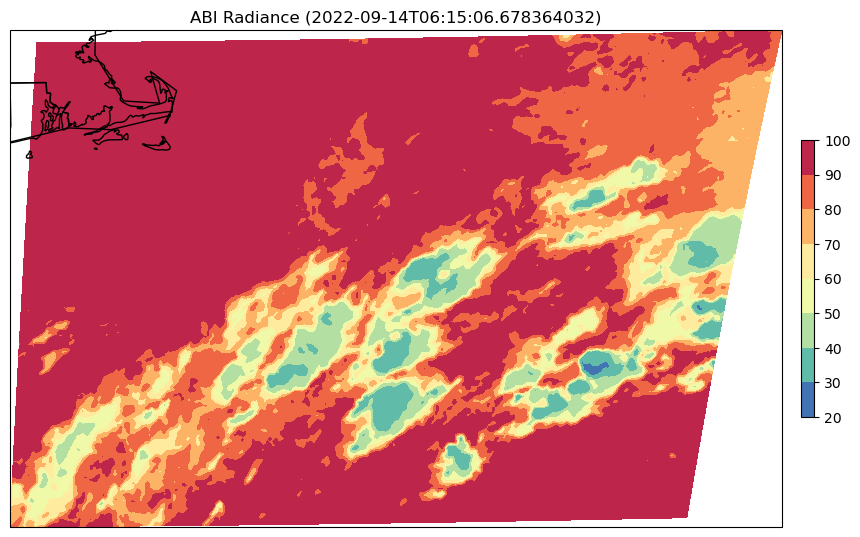

In [25]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.Spectral_r
#levels = np.linspace(-0.5, 0.5, 31)

c=ax.contourf(subset.Rad.lon, subset.Rad.lat, subset.Rad, cmap=cmap)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('ABI Radiance ('+str(subset.t.values)+')')
clb.set_label('')

ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)

## Combining the range of times

In [26]:
abi_3d_xarray = []

for filename in os.listdir(root):
    
    print(filename)
    
    #abi_3d_xarray.append(FLC_warn_xarray(filename))

OR_ABI-L1b-RadF-M6C16_G16_s20222570610207_e20222570619526_c20222570619591.nc
OR_ABI-L1b-RadF-M6C16_G16_s20222570510207_e20222570519526_c20222570519587.nc
OR_ABI-L1b-RadF-M6C16_G16_s20222570520207_e20222570529526_c20222570529582.nc
OR_ABI-L1b-RadF-M6C16_G16_s20222570730207_e20222570739526_c20222570739589.nc
OR_ABI-L1b-RadF-M6C16_G16_s20222570650207_e20222570659526_c20222570659583.nc
OR_ABI-L1b-RadF-M6C16_G16_s20222570630207_e20222570639526_c20222570639596.nc
OR_ABI-L1b-RadF-M6C16_G16_s20222570620207_e20222570629526_c20222570629586.nc
OR_ABI-L1b-RadF-M6C16_G16_s20222570740207_e20222570749526_c20222570749580.nc
OR_ABI-L1b-RadF-M6C16_G16_s20222570540207_e20222570549526_c20222570549596.nc
OR_ABI-L1b-RadF-M6C16_G16_s20222570700207_e20222570709526_c20222570709585.nc
OR_ABI-L1b-RadF-M6C16_G16_s20222570750207_e20222570759526_c20222570759585.nc
OR_ABI-L1b-RadF-M6C16_G16_s20222570550207_e20222570559526_c20222570559587.nc
OR_ABI-L1b-RadF-M6C16_G16_s20222570710207_e20222570719526_c20222570719591.nc

In [28]:
subset.Rad

<xarray.DataArray 'Rad' (y: 206, x: 329)>
array([[93.70569 , 93.881744, 93.70569 , ..., 87.89576 , 87.015465, 86.663345],
       [93.70569 , 93.881744, 94.05781 , ..., 89.12817 , 87.719696, 87.54364 ],
       [94.05781 , 94.05781 , 94.40992 , ..., 87.719696, 88.24787 , 87.89576 ],
       ...,
       [73.45896 , 74.51531 , 79.44495 , ..., 98.63533 , 98.98744 , 98.811386],
       [73.81107 , 79.092834, 85.43094 , ..., 98.98744 , 98.811386, 98.28321 ],
       [77.684364, 83.84641 , 84.19853 , ..., 98.98744 , 98.107155, 97.93109 ]],
      dtype=float32)
Coordinates:
  * y        (y) float32 0.11387599 0.113819994 ... 0.102451995 0.102396
  * x        (x) float32 0.0076440126 0.007700011 ... 0.025956005 0.026012003
    t        datetime64[ns] 2022-09-14T06:15:06.678364032
    y_image  float32 0.0
    x_image  float32 0.0
    lat      (y, x) float32 42.472664 42.472725 42.473076 ... 37.0087 37.009174
    lon      (y, x) float32 -71.49289 -71.467155 ... -64.03719 -64.01304
Attributes:
    long_name:              ABI L1b Radiances
    standard_name:          toa_outgoing_radiance_per_unit_wavenumber
    sensor_band_bit_depth:  10
    valid_range:            [   0 1022]
    units:                  mW m-2 sr-1 (cm-1)-1
    resolution:             y: 0.000056 rad x: 0.000056 rad
    grid_mapping:           goes_imager_projection
    cell_methods:           t: point area: point
    ancillary_variables:    DQF

In [37]:
#--- Initialize the 2D summed array with zeroes

subset_Rad_tot = [ [0]*len(subset.Rad[0]) for i in range(len(subset.Rad))]

#--- For each of the files in dir, crop and sum the radiances

for filename in os.listdir(root):
    
    print(filename)
    
    data = xr.open_dataset(root+'/'+filename)
    
    ds = calc_latlon(data)
    
    ((x1,x2), (y1, y2)) = get_xy_from_latlon(ds, lats, lons)
    
    subset = ds.sel(x=slice(x1, x2), y=slice(y2, y1))
    
    subset_Rad_tot = subset_Rad_tot+subset.Rad

OR_ABI-L1b-RadF-M6C16_G16_s20222570610207_e20222570619526_c20222570619591.nc


/tmp/ipykernel_9090/1456945755.py:20: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


OR_ABI-L1b-RadF-M6C16_G16_s20222570510207_e20222570519526_c20222570519587.nc


/tmp/ipykernel_9090/1456945755.py:20: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


OR_ABI-L1b-RadF-M6C16_G16_s20222570520207_e20222570529526_c20222570529582.nc


/tmp/ipykernel_9090/1456945755.py:20: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


OR_ABI-L1b-RadF-M6C16_G16_s20222570730207_e20222570739526_c20222570739589.nc


/tmp/ipykernel_9090/1456945755.py:20: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


OR_ABI-L1b-RadF-M6C16_G16_s20222570650207_e20222570659526_c20222570659583.nc


/tmp/ipykernel_9090/1456945755.py:20: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


OR_ABI-L1b-RadF-M6C16_G16_s20222570630207_e20222570639526_c20222570639596.nc


/tmp/ipykernel_9090/1456945755.py:20: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


OR_ABI-L1b-RadF-M6C16_G16_s20222570620207_e20222570629526_c20222570629586.nc


/tmp/ipykernel_9090/1456945755.py:20: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


OR_ABI-L1b-RadF-M6C16_G16_s20222570740207_e20222570749526_c20222570749580.nc


/tmp/ipykernel_9090/1456945755.py:20: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


OR_ABI-L1b-RadF-M6C16_G16_s20222570540207_e20222570549526_c20222570549596.nc


/tmp/ipykernel_9090/1456945755.py:20: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


OR_ABI-L1b-RadF-M6C16_G16_s20222570700207_e20222570709526_c20222570709585.nc


/tmp/ipykernel_9090/1456945755.py:20: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


OR_ABI-L1b-RadF-M6C16_G16_s20222570750207_e20222570759526_c20222570759585.nc


/tmp/ipykernel_9090/1456945755.py:20: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


OR_ABI-L1b-RadF-M6C16_G16_s20222570550207_e20222570559526_c20222570559587.nc


/tmp/ipykernel_9090/1456945755.py:20: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


OR_ABI-L1b-RadF-M6C16_G16_s20222570710207_e20222570719526_c20222570719591.nc


/tmp/ipykernel_9090/1456945755.py:20: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


OR_ABI-L1b-RadF-M6C16_G16_s20222570720207_e20222570729526_c20222570729595.nc


/tmp/ipykernel_9090/1456945755.py:20: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


OR_ABI-L1b-RadF-M6C16_G16_s20222570640207_e20222570649526_c20222570649581.nc


/tmp/ipykernel_9090/1456945755.py:20: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


OR_ABI-L1b-RadF-M6C16_G16_s20222570530207_e20222570539526_c20222570539587.nc


/tmp/ipykernel_9090/1456945755.py:20: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


OR_ABI-L1b-RadF-M6C16_G16_s20222570600207_e20222570609526_c20222570609594.nc


/tmp/ipykernel_9090/1456945755.py:20: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


OR_ABI-L1b-RadF-M6C16_G16_s20222570500207_e20222570509526_c20222570509587.nc


/tmp/ipykernel_9090/1456945755.py:20: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


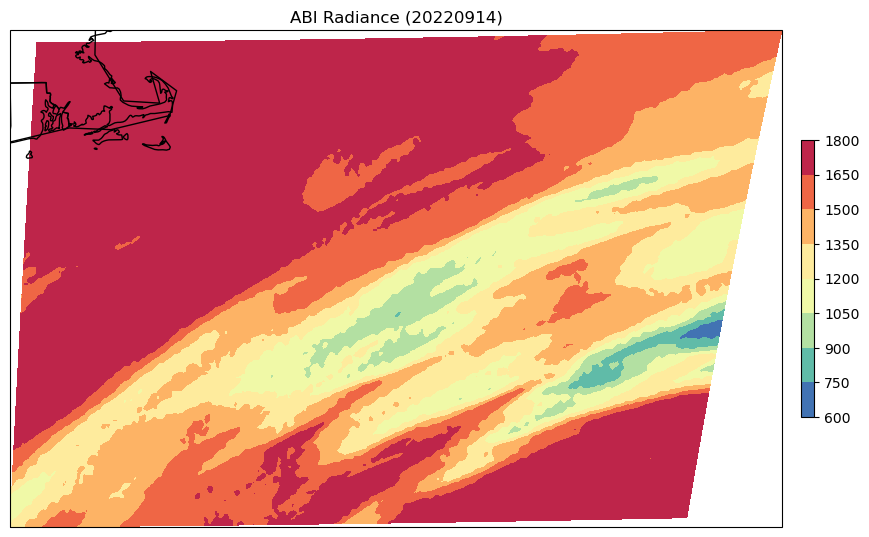

In [40]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.Spectral_r
#levels = np.linspace(-0.5, 0.5, 31)

c=ax.contourf(subset_Rad_tot.lon, subset_Rad_tot.lat, subset_Rad_tot, cmap=cmap)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('ABI Radiance ('+date+')')
clb.set_label('')

ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)